In [ ]:
!pip install scikeras

In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from matplotlib import pyplot


Mounted at /content/gdrive


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Train: 0.908, Test: 0.907


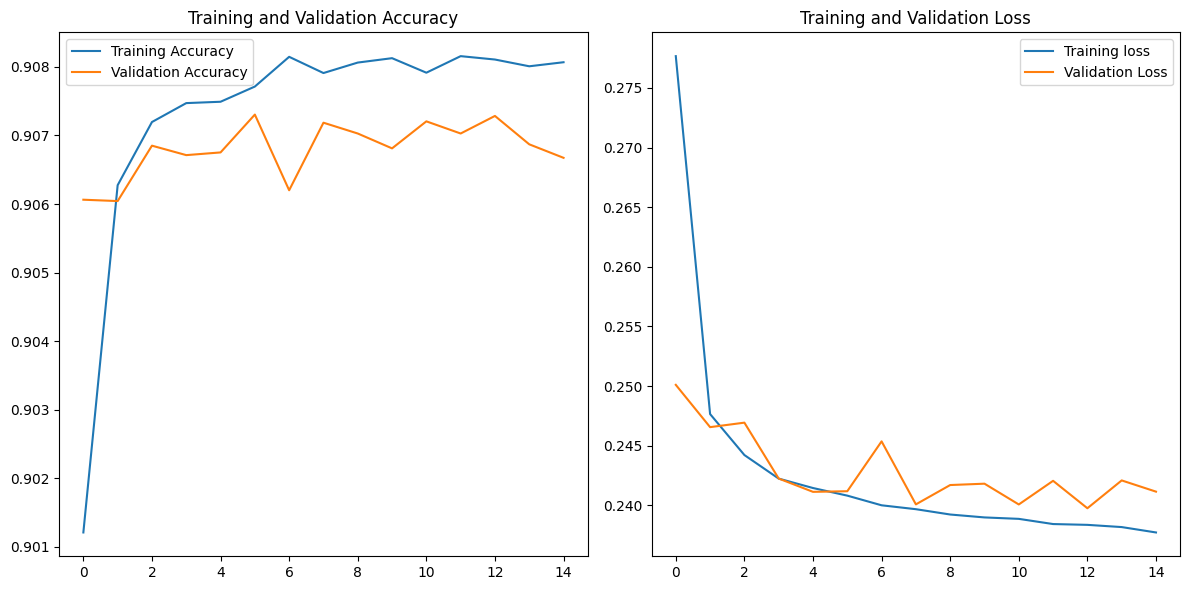

In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from matplotlib import pyplot

from google.colab import drive
drive.mount('/content/gdrive')

df=pd.read_csv("/content/gdrive/My Drive/Data/heart_disease_health_indicators_BRFSS2015.csv", header=None, dtype="string")
data=df.values

# data preparation
X=data[1:,1:23].astype(float)
Y=data[1::,0].astype(float)

# split the data
train_X, test_X, train_y, test_y = train_test_split(X, Y, test_size=0.20, shuffle=True)

#train_X=np.array([np.array(val) for val in train_X])
#train_X=tf.convert_to_tensor(train_X, dtype=tf.float32)

# 1. shallow model + Early Stopping
def single_layer():
  model=Sequential()
  model.add(Dense(21, input_shape=(21,), activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

# early stopping
es=EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)

# fit model
model=single_layer()
history=model.fit(train_X, train_y, validation_data=(test_X, test_y), epochs=15, verbose=0, callbacks=[es])

# evaluate the model
_, train_accuracy = model.evaluate(train_X, train_y, verbose=0)
_, test_accuracy = model.evaluate(test_X, test_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_accuracy, test_accuracy))

# plot
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

pyplot.figure(figsize=(12,6))
pyplot.subplot(1,2,1)
pyplot.plot(epochs, acc, label='Training Accuracy')
pyplot.plot(epochs, val_acc, label='Validation Accuracy')
pyplot.title('Training and Validation Accuracy')
pyplot.legend()

pyplot.subplot(1,2,2)
pyplot.plot(epochs, loss, label='Training loss')
pyplot.plot(epochs, val_loss, label='Validation Loss')
pyplot.title('Training and Validation Loss')
pyplot.legend()

pyplot.tight_layout()
pyplot.savefig('model1.png')
pyplot.show()



Train: 0.908, Test: 0.906


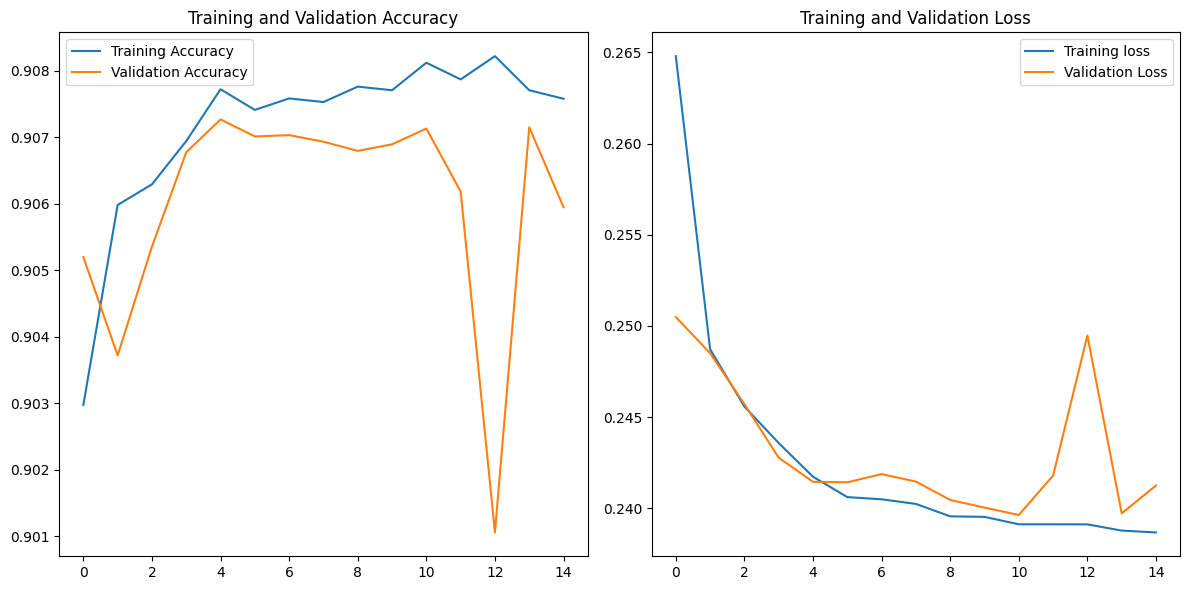

In [ ]:
# 2. shallow model with smaller nodes + Early Stopping
def single_smaller():
  model=Sequential()
  model.add(Dense(10, input_shape=(21,), activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

# early stopping
es=EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)

# fit model
model=single_smaller()
history=model.fit(train_X, train_y, validation_data=(test_X, test_y), epochs=15, verbose=0, callbacks=[es])

# evaluate the model
_, train_accuracy = model.evaluate(train_X, train_y, verbose=0)
_, test_accuracy = model.evaluate(test_X, test_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_accuracy, test_accuracy))

# plot
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

pyplot.figure(figsize=(12,6))
pyplot.subplot(1,2,1)
pyplot.plot(epochs, acc, label='Training Accuracy')
pyplot.plot(epochs, val_acc, label='Validation Accuracy')
pyplot.title('Training and Validation Accuracy')
pyplot.legend()

pyplot.subplot(1,2,2)
pyplot.plot(epochs, loss, label='Training loss')
pyplot.plot(epochs, val_loss, label='Validation Loss')
pyplot.title('Training and Validation Loss')
pyplot.legend()

pyplot.tight_layout()
pyplot.show()

Train: 0.907, Test: 0.906


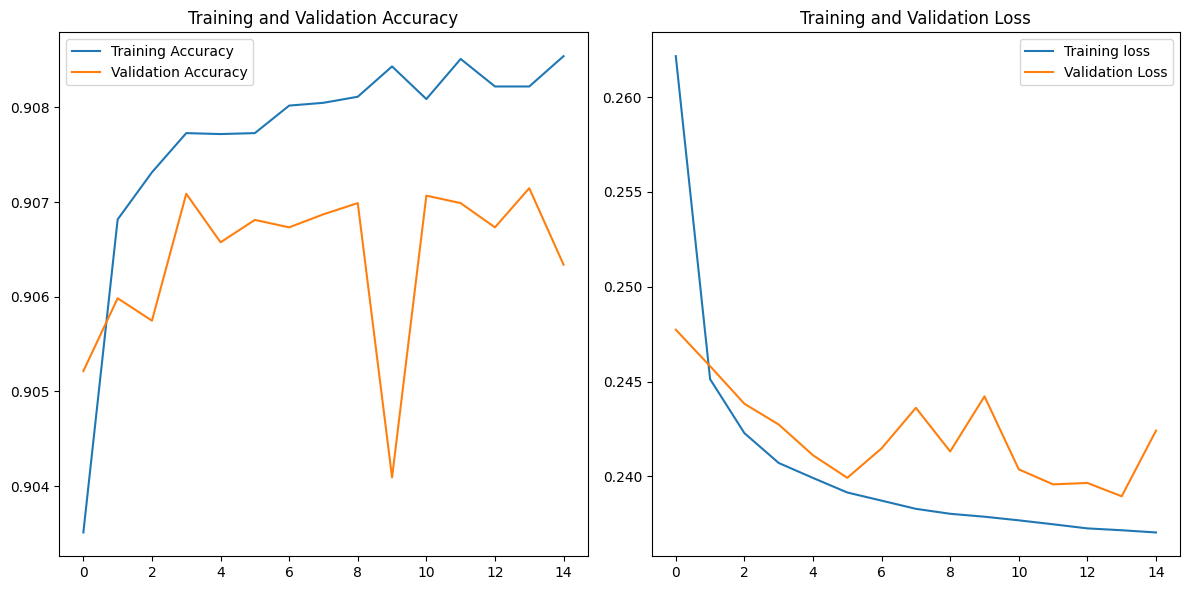

In [ ]:
# 3. deep model with two layers + Early Stopping
def two_layers():
  model=Sequential()
  model.add(Dense(21, input_shape=(21,), activation='relu'))
  model.add(Dense(10, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

# early stopping
es=EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)

# fit model
model=two_layers()
history=model.fit(train_X, train_y, validation_data=(test_X, test_y), epochs=15, verbose=0, callbacks=[es])

# evaluate the model
_, train_accuracy = model.evaluate(train_X, train_y, verbose=0)
_, test_accuracy = model.evaluate(test_X, test_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_accuracy, test_accuracy))

# plot
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

pyplot.figure(figsize=(12,6))
pyplot.subplot(1,2,1)
pyplot.plot(epochs, acc, label='Training Accuracy')
pyplot.plot(epochs, val_acc, label='Validation Accuracy')
pyplot.title('Training and Validation Accuracy')
pyplot.legend()

pyplot.subplot(1,2,2)
pyplot.plot(epochs, loss, label='Training loss')
pyplot.plot(epochs, val_loss, label='Validation Loss')
pyplot.title('Training and Validation Loss')
pyplot.legend()

pyplot.tight_layout()
pyplot.show()

Train: 0.906, Test: 0.905


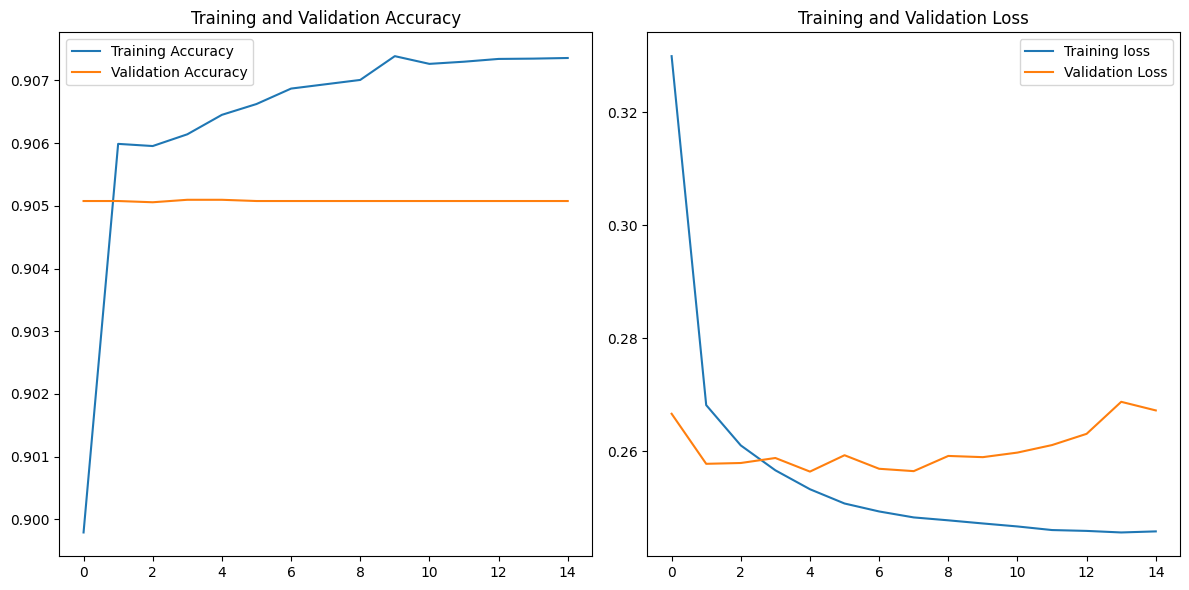

In [ ]:
# 4. deep model with two layers + Dropout
def two_layers_dropout():
  model=Sequential()
  model.add(Dense(21, input_shape=(21,), activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(10, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

# fit model
model=two_layers_dropout()
history=model.fit(train_X, train_y, validation_data=(test_X, test_y),
                  epochs=15, verbose=0, batch_size=256)

# evaluate the model
_, train_accuracy = model.evaluate(train_X, train_y, verbose=0)
_, test_accuracy = model.evaluate(test_X, test_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_accuracy, test_accuracy))

# plot
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

pyplot.figure(figsize=(12,6))
pyplot.subplot(1,2,1)
pyplot.plot(epochs, acc, label='Training Accuracy')
pyplot.plot(epochs, val_acc, label='Validation Accuracy')
pyplot.title('Training and Validation Accuracy')
pyplot.legend()

pyplot.subplot(1,2,2)
pyplot.plot(epochs, loss, label='Training loss')
pyplot.plot(epochs, val_loss, label='Validation Loss')
pyplot.title('Training and Validation Loss')
pyplot.legend()

pyplot.tight_layout()
pyplot.show()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Train: 0.908, Test: 0.907


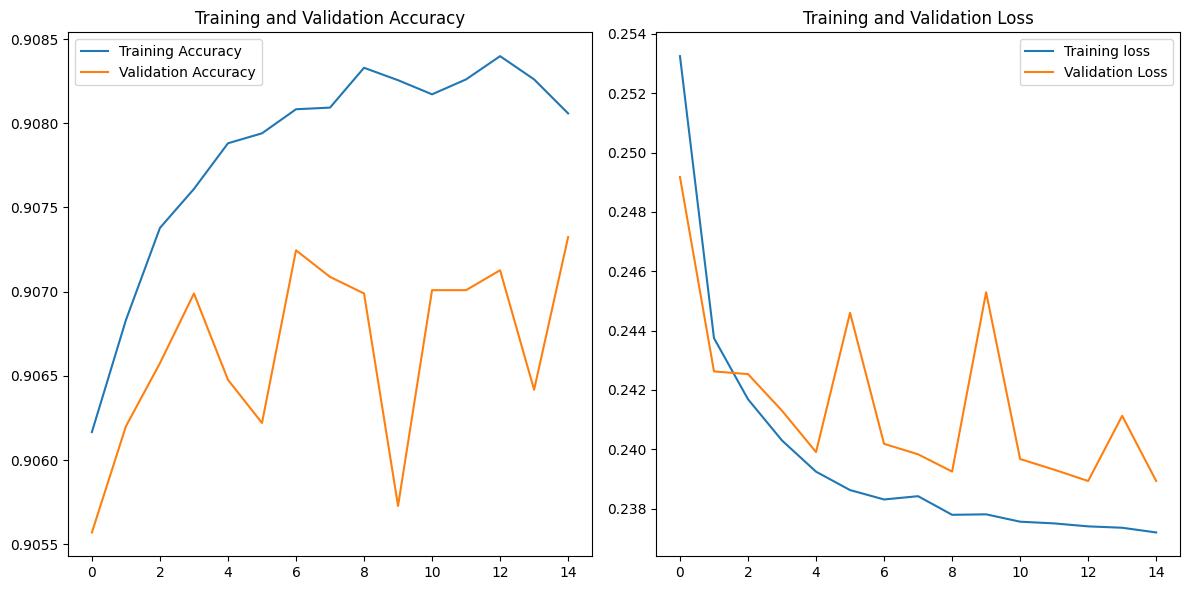

In [ ]:
# 5. Deep model with three layers + Early Stopping
def three_layers():
  model=Sequential()
  model.add(Dense(21, input_shape=(21,), activation='relu'))
  model.add(Dense(10, activation='relu'))
  model.add(Dense(10, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

# early stopping
es=EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)


# fit model
model=three_layers()
history=model.fit(train_X, train_y, validation_data=(test_X, test_y), epochs=15, verbose=0, callbacks=[es])

# evaluate the model
_, train_accuracy = model.evaluate(train_X, train_y, verbose=0)
_, test_accuracy = model.evaluate(test_X, test_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_accuracy, test_accuracy))

# plot
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

pyplot.figure(figsize=(12,6))
pyplot.subplot(1,2,1)
pyplot.plot(epochs, acc, label='Training Accuracy')
pyplot.plot(epochs, val_acc, label='Validation Accuracy')
pyplot.title('Training and Validation Accuracy')
pyplot.legend()

pyplot.subplot(1,2,2)
pyplot.plot(epochs, loss, label='Training loss')
pyplot.plot(epochs, val_loss, label='Validation Loss')
pyplot.title('Training and Validation Loss')
pyplot.legend()

pyplot.tight_layout()
pyplot.show()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Train: 0.906, Test: 0.905


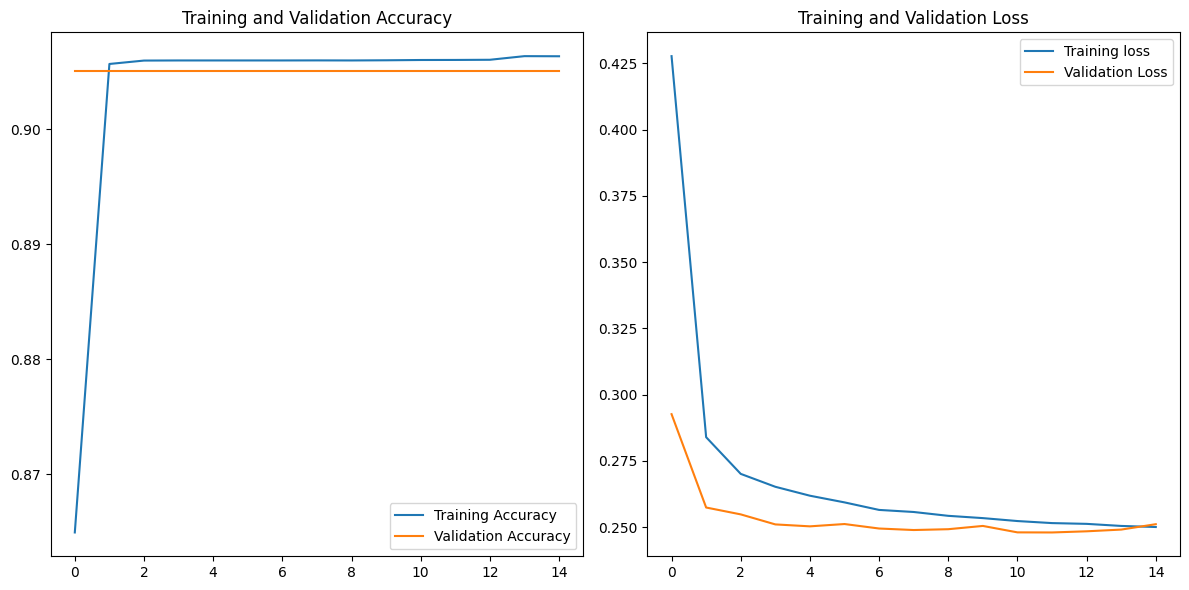

In [ ]:
# 6. Deep model with three layers + Dropout
def three_layers_dropout():
  model=Sequential()
  model.add(Dense(21, input_shape=(21,), activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(10, activation='relu'))
  model.add(Dense(10, activation='relu'))
  model.add(Dropout(0.25))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model


# fit model
model=three_layers_dropout()
history=model.fit(train_X, train_y, validation_data=(test_X, test_y), epochs=15, verbose=0, batch_size=256)

# evaluate the model
_, train_accuracy = model.evaluate(train_X, train_y, verbose=0)
_, test_accuracy = model.evaluate(test_X, test_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_accuracy, test_accuracy))

# plot
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

pyplot.figure(figsize=(12,6))
pyplot.subplot(1,2,1)
pyplot.plot(epochs, acc, label='Training Accuracy')
pyplot.plot(epochs, val_acc, label='Validation Accuracy')
pyplot.title('Training and Validation Accuracy')
pyplot.legend()

pyplot.subplot(1,2,2)
pyplot.plot(epochs, loss, label='Training loss')
pyplot.plot(epochs, val_loss, label='Validation Loss')
pyplot.title('Training and Validation Loss')
pyplot.legend()

pyplot.tight_layout()
pyplot.show()